# JUDUL

Jelaskan Masalah yang dihadapi

## Peralatan (Library) yang digunakan

In [10]:
import pandas as pd
import numpy as np
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

from scipy.stats import pearsonr

Jelaskan Metadata

In [3]:
# Download file converted.csv and test
!gdown 1jPd-dEFxwTh5O19-Nbcg3rwmyaYgiyaR -O converted.csv
!gdown https://drive.google.com/drive/folders/1nKHlssJ3NrFCEjw-ZG3tTqizcn2_1qIv?usp=drive_link -O /content/ --folder

Downloading...
From: https://drive.google.com/uc?id=1jPd-dEFxwTh5O19-Nbcg3rwmyaYgiyaR
To: /content/converted.csv
100% 6.44M/6.44M [00:00<00:00, 36.5MB/s]
Retrieving folder contents
Processing file 1TISmFADkEEuBDqCtka9PhMqlKMCucSNU A.png
Processing file 1ydIwwMv1p9saEIeOi9QBaOTvHihIwyXG B.png
Processing file 1IZnvLQy4ex_GQHhSk7GfWb71YKy9aYpL D.png
Processing file 15KLS_VLAvuw_FnRPrYBI4eCX0mAyV-C6 E.png
Processing file 19axg_dAiahjGhHXD-5SYAyHYXgCQ1ono F.png
Processing file 1-OHi75-Iaa_Kr1k8-OPBhFcnMDTUYmpY G.png
Processing file 1cNIAjOScbEq-INpP5fKs3zqF6RUOOzl_ H.png
Processing file 1144hLvSMSHyUI1zMsFOZN6-YNmpjCDFO I.png
Processing file 1g5JIFWFQ1I-x62rW0NYqRxwxzY2lIvPp J.png
Processing file 1YID0w97SNROtWyqHftVkbHunXIJZuZTY K.png
Processing file 1FDTdgBLE4opBQCM6hIvq6i2e3_e19lSY L.png
Processing file 18RoGTa0MtK6ex9zfmmta_86xmrFtQ018 M.png
Processing file 1Z8dlnG-rhB1rgCHL5K8xGj64QujJ7VSz N.png
Processing file 180hC-wNBVXM1d5gHJQgWguHGjFSRY3kM O.png
Processing file 1D9bDkRS8c3RiW6ZJh5

In [4]:
df = pd.read_csv('converted.csv')

First 5 rows:
   Huruf  x_min  y_min  width  height  onpix      x_bar      y_bar      x2bar  \
0      0      7      4     14      20    136  14.007353  13.602941  11.257299   
1      0      6      4     16      20    186  14.645161  13.994624  18.196670   
2      0      5      4     18      20    200  13.930000  13.470000  25.975100   
3      0      6      4     16      20    145  13.910345  14.420690  12.398859   
4      0      5      4     18      20    120  14.383333  13.408333  20.869722   

       y2bar      xybar        x2ybr        xy2br      x_edge     xegvy  \
0  23.768815  -1.026492  2819.602941  2918.911765  246.857143  0.111886   
1  27.715025 -10.340617  2982.580645  2991.258065  283.428571  0.219237   
2  28.149100  -5.867100  2845.570000  2756.850000  329.142857  0.125516   
3  26.947158  -5.879524  2841.227586  3102.413793  265.142857  0.230048   
4  24.041597  -9.423194  2856.350000  2651.700000  265.142857  0.071002   

       y_edge     yegvx  
0  155.428571  0.06899

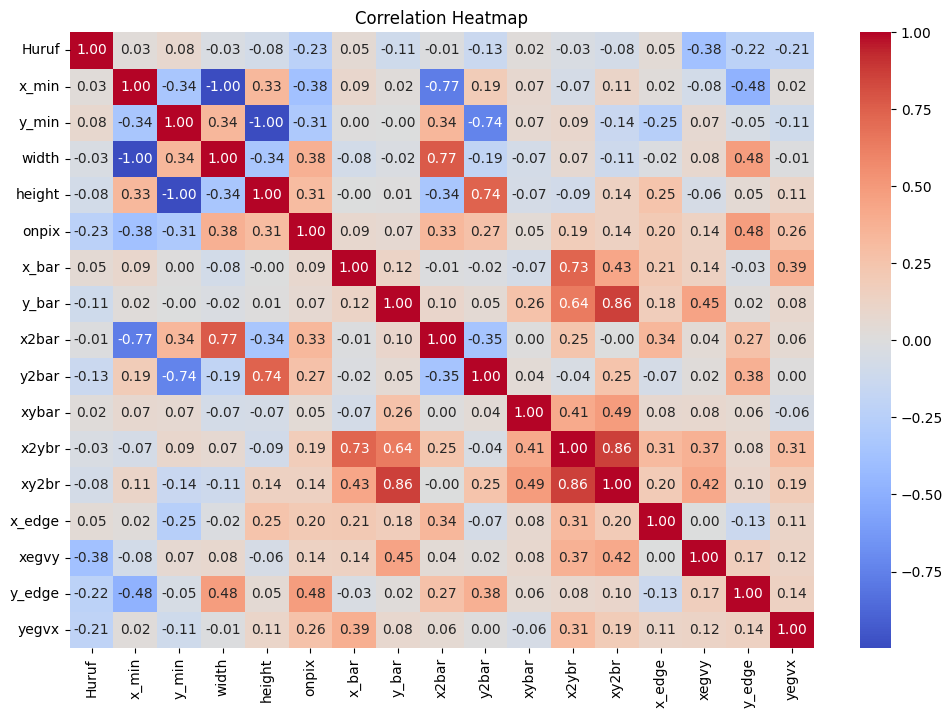

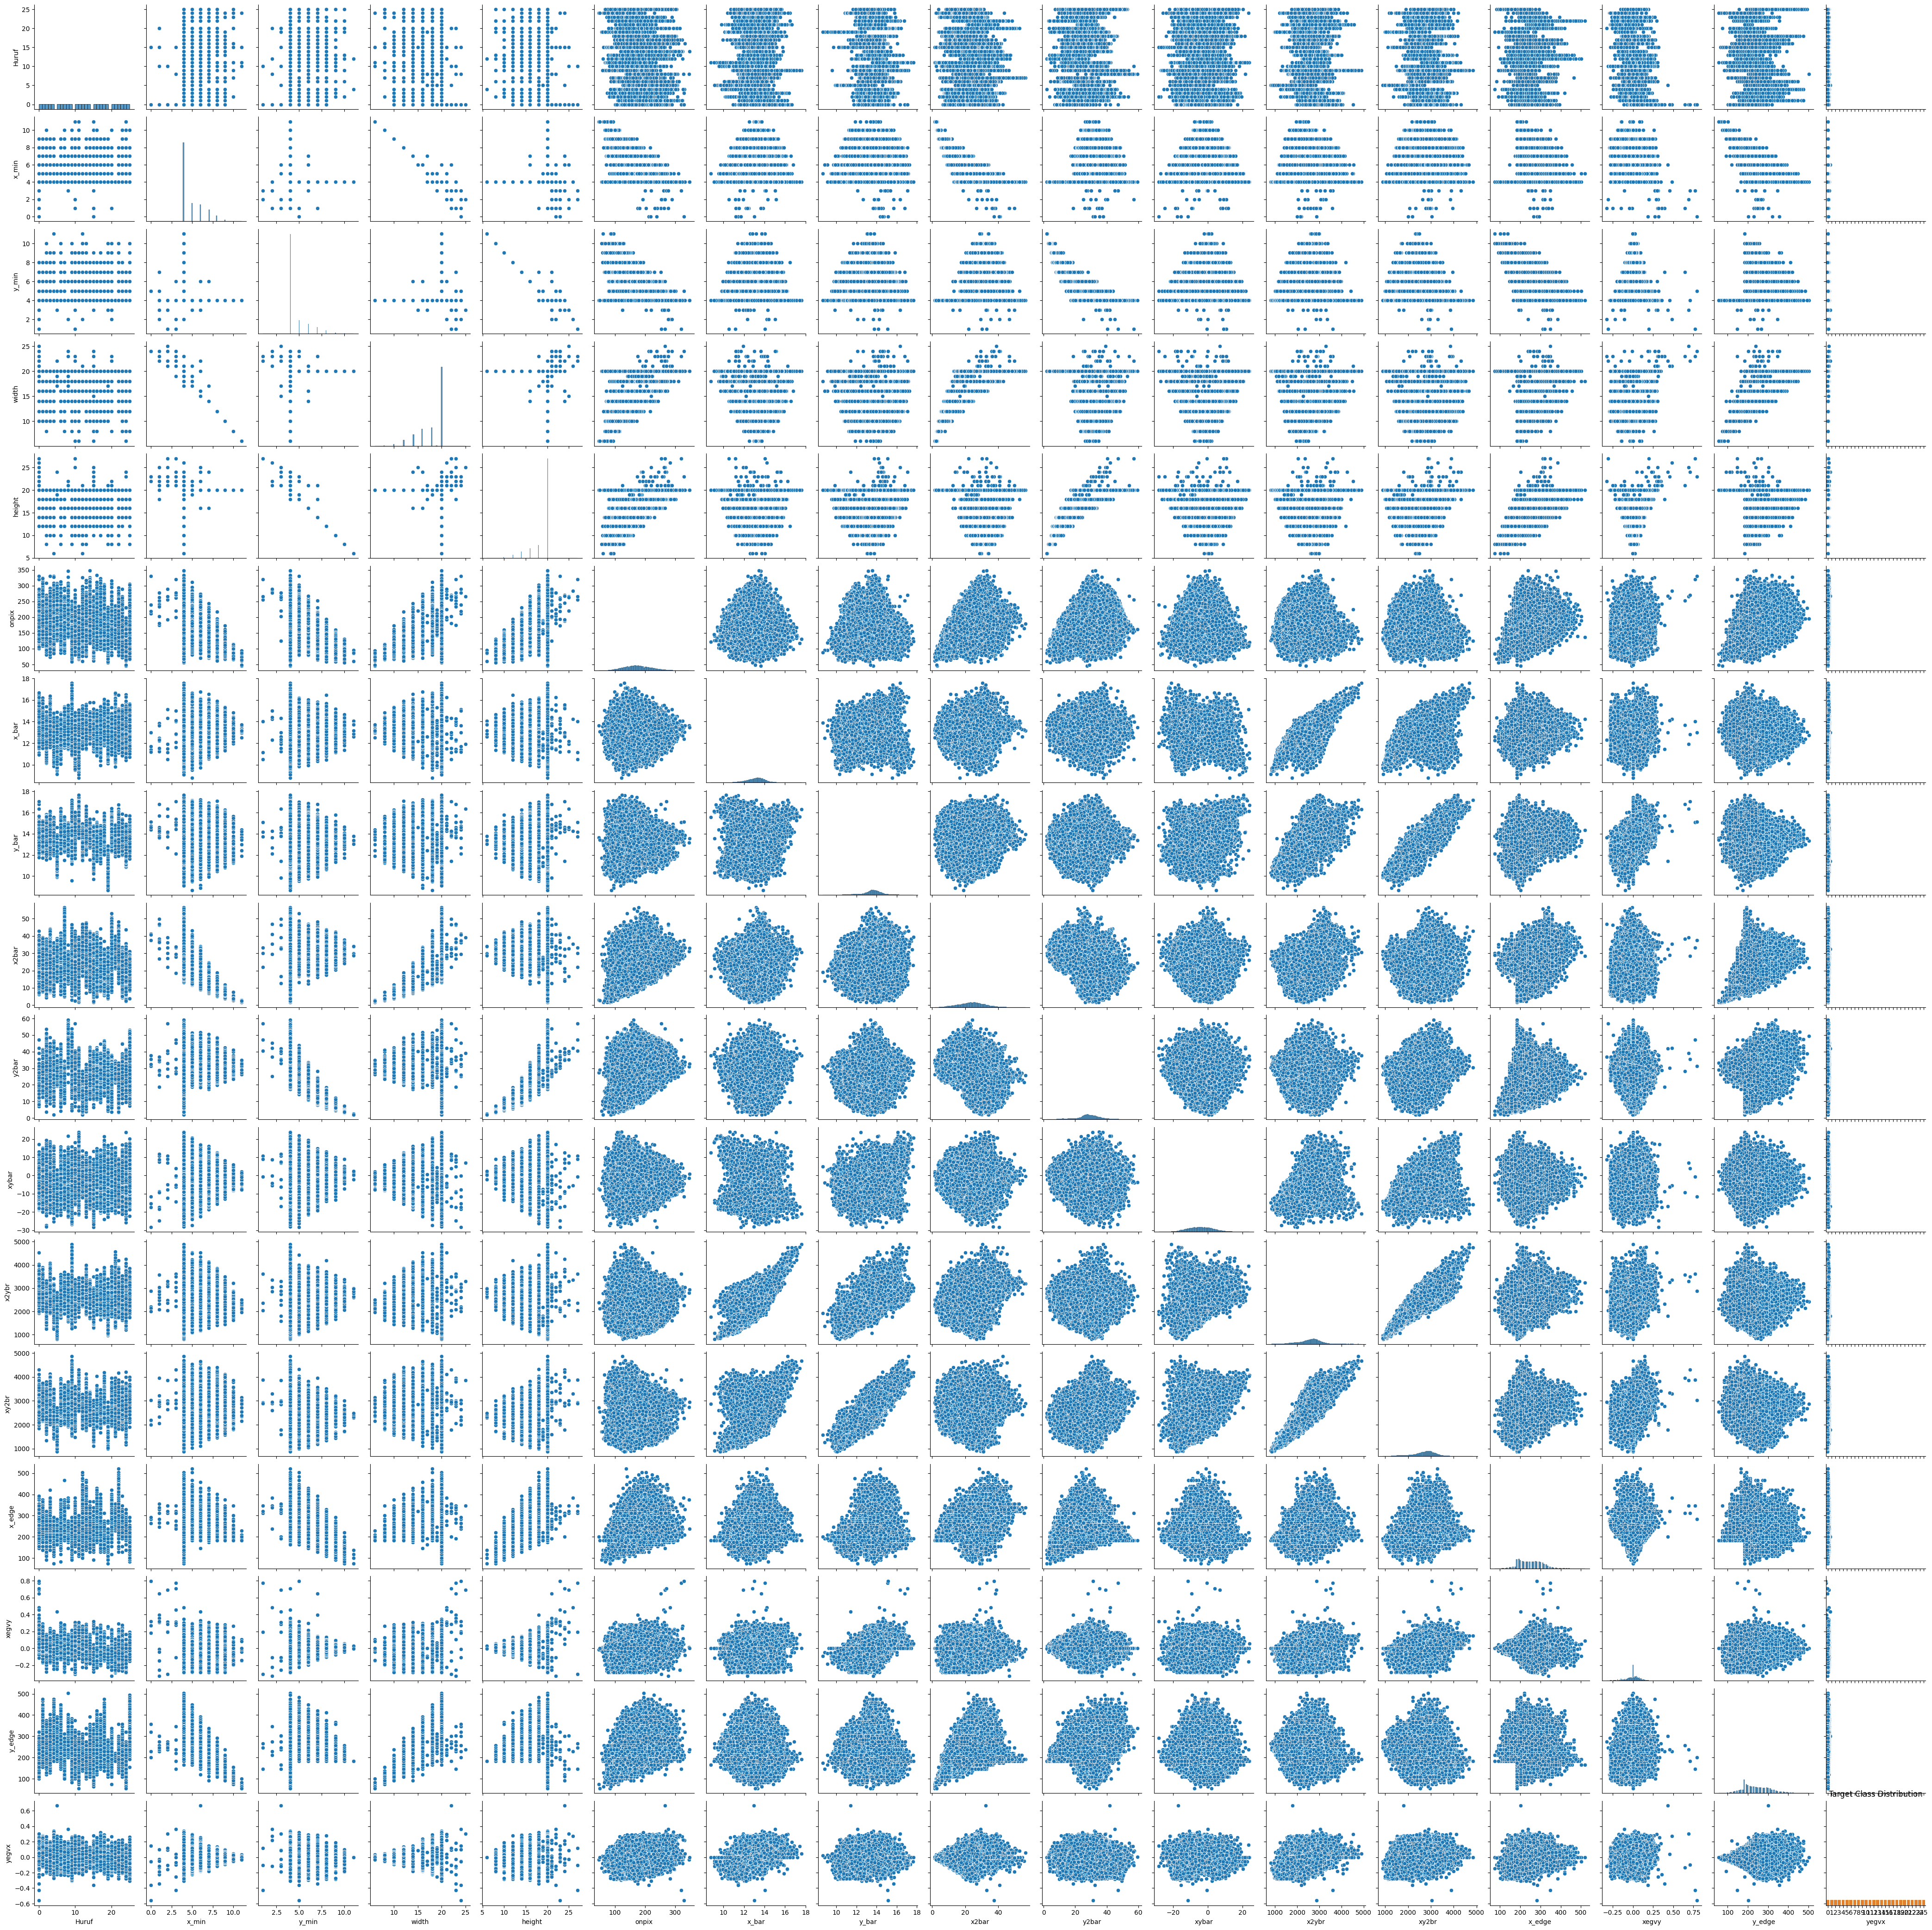

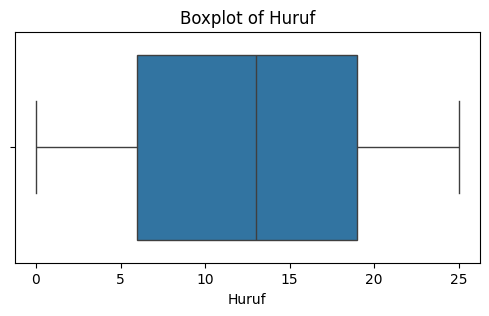

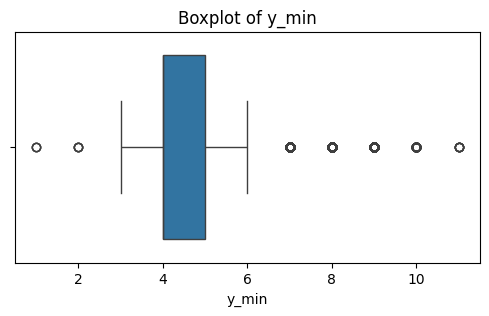

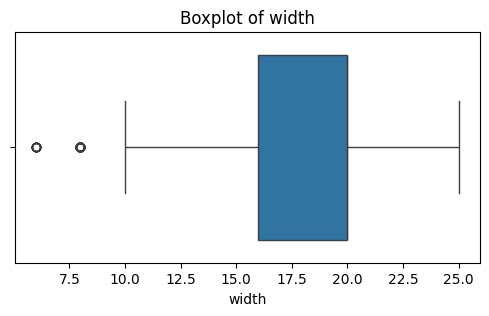

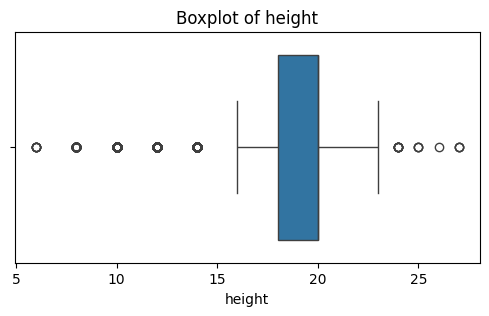

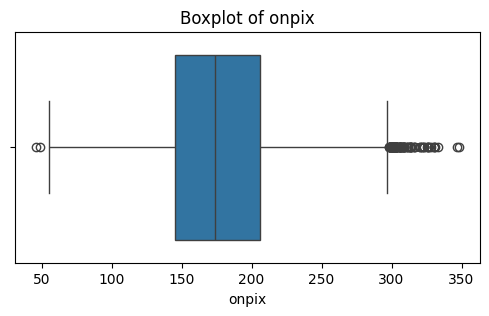

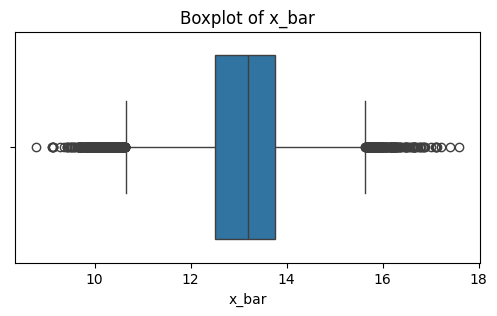

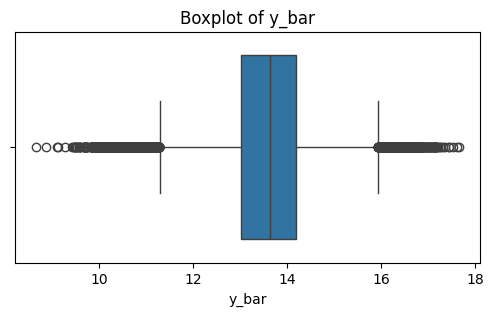

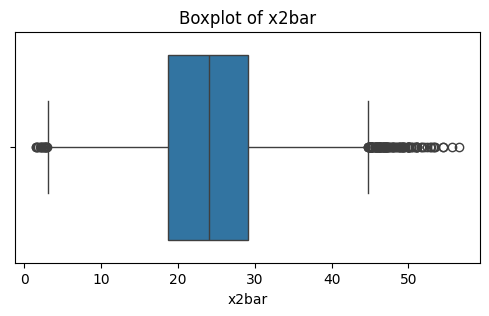

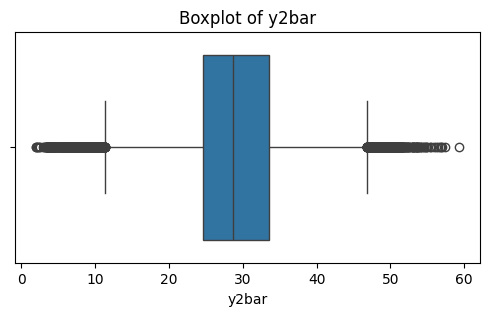

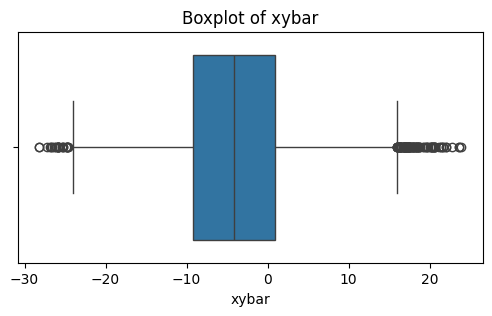

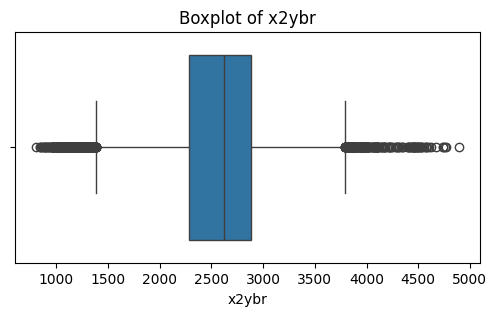

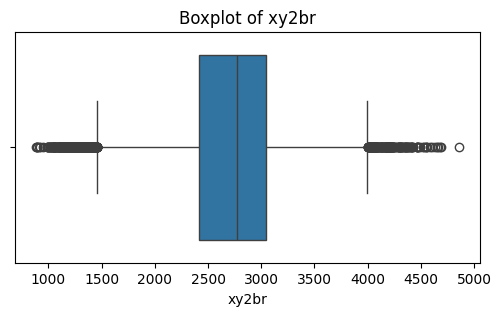

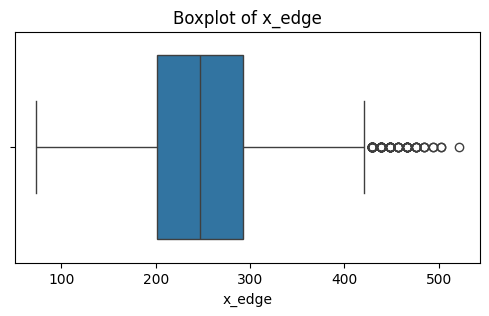

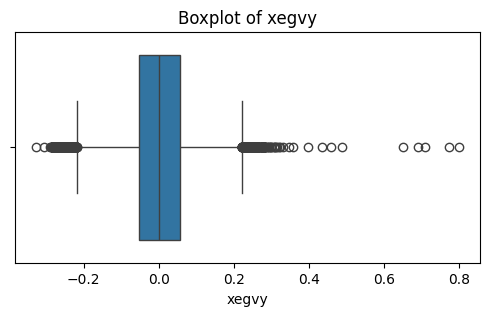

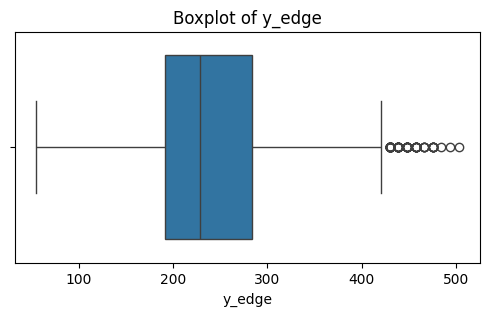

In [5]:
# Visualisasi Data (EDA) Pake Grafik PairPlot

print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())

print(f"Number of duplicate rows: {df.duplicated().sum()}")
print(df.dtypes)

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df)                           # scatter plots of relationships

sns.countplot(x='Huruf', data=df)
plt.title("Target Class Distribution")
plt.show()

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()                             # outliers

## Penjelasan Data Preprocessing (selected.csv) --> (converted.csv)

In [6]:
# Fungsi ubah data GrayScale (784 fitur) ke 17 Fitur

## Penjelasan Pelatihan dan Pengujian Data (secara umum)

In [7]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Pertama: KNN

In [ ]:
# Pipeline untuk KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Parameter grid untuk KNN
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 11)),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# GridSearchCV untuk KNN
knn_grid_search = GridSearchCV(estimator=knn_pipeline,
                               param_grid=knn_param_grid,
                               cv=3,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=2)

# Training
knn_grid_search.fit(X_train, y_train)

# Prediksi
knn_y_pred = knn_grid_search.predict(X_test)

# Simpan best model
with open('best_knn_model.pkl', 'wb') as f:
    pickle.dump(knn_grid_search.best_estimator_, f)

# Simpan semua hasil GridSearch
knn_results_df = pd.DataFrame(knn_grid_search.cv_results_)
knn_results_df.to_csv('knn_gridsearch_results.csv', index=False)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=distance; total time=   0.6s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform; total time=   0.8s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform; total time=   1.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform; total time=   1.2s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=distance; total time=   0.5s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=distance; total time=   0.6s
[CV] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform; total time=   0.8s
[CV] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform; total time=   0.8s
[CV] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance; total time=   0.7s
[CV] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform; total time=   0.9s
[CV]

#### Penjelasan mengenai Visualisasi yang digunakan

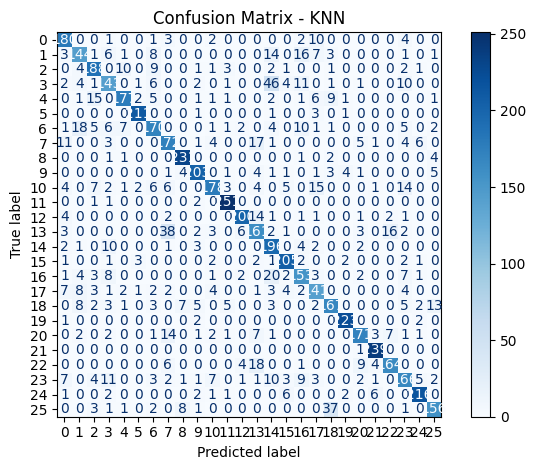

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, knn_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.tight_layout()
plt.show()

In [ ]:
# K-Fold Cross Validation
knn_kf = KFold(n_splits=5, shuffle=True, random_state=42)

knn_cv_scores_kf = cross_val_score(knn_pipeline, X_train, y_train, cv=knn_kf, scoring='accuracy')
print("K-Fold Cross Validation scores:", knn_cv_scores_kf)
print("Mean accuracy:", knn_cv_scores_kf.mean())


# Stratified K-Fold Cross Validation
knn_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_skf = cross_val_score(knn_pipeline, X_train, y_train, cv=knn_skf, scoring='accuracy')
print("Stratified K-Fold CV scores:", cv_scores_skf)
print("Mean accuracy:", cv_scores_skf.mean())


# Cross-Validation dengan StratifiedKFold
knn_best = knn_grid_search.best_estimator_

knn_cv_scores_best = cross_val_score(knn_best, X_train, y_train, cv=knn_skf, scoring='accuracy')
print("CV scores with best estimator:", knn_cv_scores_best)
print("Mean accuracy (best estimator):", knn_cv_scores_best.mean())

K-Fold Cross Validation scores: [0.81979859 0.80437112 0.80094279 0.79922863 0.8131562 ]
Mean accuracy: 0.8074994643239768
Stratified K-Fold CV scores: [0.80072852 0.80994215 0.79837154 0.81058496 0.80329976]
Mean accuracy: 0.8045853867580888
CV scores with best estimator: [0.81615599 0.81379901 0.81401328 0.8204414  0.80865652]
Mean accuracy (best estimator): 0.814613241911292


### Model Kedua: Random Forest

In [ ]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Parameter grid untuk Random Forest
rf_param_grid = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10]
}

# GridSearchCV untuk Random Forest
rf_grid_search = GridSearchCV(estimator=rf_pipeline,
                              param_grid=rf_param_grid,
                              cv=3,
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=2)

# Training
rf_grid_search.fit(X_train, y_train)

# Prediksi
rf_y_pred = rf_grid_search.predict(X_test)

# Simpan best model
with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(rf_grid_search.best_estimator_, f)

# Simpan semua hasil GridSearch
rf_results_df = pd.DataFrame(rf_grid_search.cv_results_)
rf_results_df.to_csv('rf_gridsearch_results.csv', index=False)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=50; total time=   3.3s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=50; total time=   3.7s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=50; total time=   4.0s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=100; total time=   8.7s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=100; total time=   7.1s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=100; total time=   8.0s
[CV] END rf__max_depth=None, rf__min_samples_split=5, rf__n_estimators=50; total time=   3.7s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=150; total time=  11.3s
[CV] END rf__max_depth=None, rf__min_samples_split=5, rf__n_estimators=50; total time=   3.8s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=150; total time=  

#### Penjelasan Visualisasi Hasil

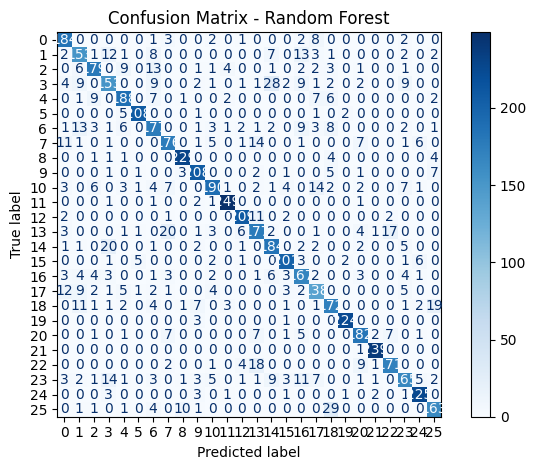

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

In [ ]:
# K-Fold Cross Validation
rf_kf = KFold(n_splits=5, shuffle=True, random_state=42)

rf_cv_scores_kf = cross_val_score(rf_pipeline, X_train, y_train, cv=rf_kf, scoring='accuracy')
print("K-Fold Cross Validation scores:", rf_cv_scores_kf)
print("Mean accuracy:", rf_cv_scores_kf.mean())


# Stratified K-Fold Cross Validation
rf_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_cv_scores_skf = cross_val_score(rf_pipeline, X_train, y_train, cv=rf_skf, scoring='accuracy')
print("Stratified K-Fold CV scores:", cv_scores_skf)
print("Mean accuracy:", rf_cv_scores_skf.mean())


# Cross-Validation dengan StratifiedKFold
rf_best = rf_grid_search.best_estimator_

rf_cv_scores_best = cross_val_score(rf_best, X_train, y_train, cv=knn_skf, scoring='accuracy')
print("CV scores with best estimator:", rf_cv_scores_best)
print("Mean accuracy (best estimator):", rf_cv_scores_best.mean())

K-Fold Cross Validation scores: [0.83479751 0.8283694  0.82579816 0.81744161 0.82472681]
Mean accuracy: 0.8262266980929933
Stratified K-Fold CV scores: [0.80072852 0.80994215 0.79837154 0.81058496 0.80329976]
Mean accuracy: 0.8230983501178487
CV scores with best estimator: [0.8262267  0.8204414  0.82601243 0.83501178 0.82665524]
Mean accuracy (best estimator): 0.8268695093207628


### Model Ketiga: MLP

In [ ]:
# Pipeline: Scaling + MLP Classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=5000, random_state=42))
])

# Parameter grid untuk GridSearchCV
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    # 'mlp__activation': ['relu', 'tanh'],
    # 'mlp__solver': ['adam', 'sgd'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    # 'mlp__learning_rate': ['constant', 'adaptive']
}

# Grid Search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit ke data latih
grid_search.fit(X_train, y_train)

# Prediksi
y_pred = grid_search.predict(X_test)

# Simpan best model
with open('best_mlp_model.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

# Simpan semua hasil GridSearch
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv('mlp_gridsearch_results.csv', index=False)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,); total time=  28.8s
[CV] END ...mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,); total time=  31.0s
[CV] END ..mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,); total time=  36.0s
[CV] END ...mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,); total time=  41.1s
[CV] END ..mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,); total time=  33.1s
[CV] END ..mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,); total time=  31.6s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50); total time=  41.1s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50); total time=  37.1s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50); total time=  35.1s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100, 50); total time=  52.6s
[CV] END ....mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,); total time=  20.9s
[CV] END mlp__alpha=0.0001, mlp__hidden_layer_s

#### Penjelasan mengenai Visualisasi yang digunakan

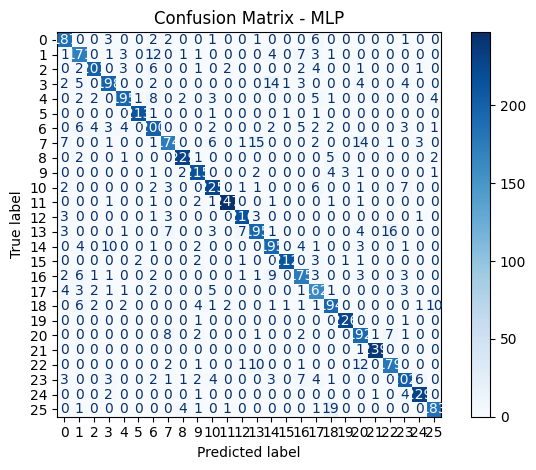

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - MLP")
plt.tight_layout()
plt.show()

In [ ]:
# K-Fold Cross Validation
mlp_kf = KFold(n_splits=5, shuffle=True, random_state=42)

mlp_cv_scores_kf = cross_val_score(pipeline, X_train, y_train, cv=mlp_kf, scoring='accuracy')
print("K-Fold Cross Validation scores:", mlp_cv_scores_kf)
print("Mean accuracy:", mlp_cv_scores_kf.mean())


# Stratified K-Fold Cross Validation
mlp_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

mlp_cv_scores_skf = cross_val_score(pipeline, X_train, y_train, cv=mlp_skf, scoring='accuracy')
print("Stratified K-Fold CV scores:", mlp_cv_scores_skf)
print("Mean accuracy:", mlp_cv_scores_skf.mean())


# Cross-Validation dengan StratifiedKFold
mlp_best = grid_search.best_estimator_

mlp_cv_scores_best = cross_val_score(mlp_best, X_train, y_train, cv=mlp_skf, scoring='accuracy')
print("CV scores with best estimator:", mlp_cv_scores_best)
print("Mean accuracy (best estimator):", mlp_cv_scores_best.mean())

K-Fold Cross Validation scores: [0.8913649  0.89007928 0.89479323 0.88022284 0.88236555]
Mean accuracy: 0.887765159631455


Exception ignored in: <function ResourceTracker.__del__ at 0x7f68917dff60>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7f5b2cadff60>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7fea54eebf60>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multip

Stratified K-Fold CV scores: [0.88493679 0.88579387 0.88750804 0.88472252 0.87915149]
Mean accuracy: 0.8844225412470538
CV scores with best estimator: [0.88772231 0.88643668 0.88986501 0.89779301 0.89007928]
Mean accuracy (best estimator): 0.890379258624384


### Penjelasan Pengukuran Kinerja/Evaluasi Model (Akurasi, Presisi, F1-Score, blabla)

In [ ]:
# Kodingan
results_df = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'Random Forest', 'MLP'],
    'Accuracy': [acc_knn, acc_svm, acc_rf, acc_mlp],
    'Precision': [prec_knn, prec_svm, prec_rf, prec_mlp],
    'Recall': [rec_knn, rec_svm, rec_rf, rec_mlp],
    'F1 Score': [f1_knn, f1_svm, f1_rf, f1_mlp]
})
display(results_df)


NameError: name 'acc_knn' is not defined

## Ensemble Learning

In [ ]:
# Pipeline: Scaling + XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional untuk XGBoost
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Hyperparameter grid
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1],
    'xgb__colsample_bytree': [0.8, 1]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Predict
y_pred = grid_search.predict(X_test)

# Save best model
with open('best_xgb_model.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

# Save GridSearch results
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv('xgb_gridsearch_results.csv', index=False)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:58:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:58:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:58:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:58:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   5.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:58:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   5.9s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   6.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:58:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:58:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   6.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:58:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   4.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   6.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  11.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  10.4s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  14.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  12.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=   9.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   9.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  11.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   9.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   9.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=   9.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=  10.9s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=   7.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  15.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  20.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  18.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  19.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:59:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  15.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:00:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  17.9s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  15.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:00:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:00:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  22.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:00:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  13.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:00:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  16.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:00:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  18.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:00:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  18.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:00:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  27.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:00:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  33.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:00:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  32.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:00:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  35.8s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   7.8s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   6.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   7.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  31.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   5.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   7.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   7.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  32.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  12.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  15.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  13.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  13.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  14.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  12.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   9.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=  12.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   9.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=  10.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:01:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=  11.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:02:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=  10.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:02:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  17.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:02:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  19.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:02:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  20.8s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:02:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  20.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:02:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  18.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:02:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  16.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:02:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  22.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:02:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:02:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  12.3s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  16.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:02:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  12.9s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  13.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:02:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:02:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  16.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:02:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  25.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:03:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  27.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:03:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  26.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:03:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  29.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:03:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   6.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:03:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   8.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:03:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   5.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:03:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   7.8s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:03:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   7.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:03:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   7.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:03:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  29.8s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  31.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:03:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:03:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  13.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:03:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  15.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:03:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  15.4s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  15.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:04:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:04:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  11.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:04:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  14.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:04:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=  11.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=  11.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:04:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:04:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=  13.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=  10.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:04:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:04:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=   9.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:04:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=  10.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:04:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  19.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:04:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  22.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:04:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  21.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:04:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  20.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:04:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  15.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  20.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  16.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  21.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  11.8s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  13.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  14.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  12.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  21.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  21.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  21.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  21.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   6.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   9.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   6.8s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   5.8s
[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   8.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:05:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  24.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:06:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  27.5s
[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   6.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:06:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:06:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  13.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:06:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  17.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:06:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  14.5s
[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  14.8s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:06:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:06:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  16.8s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:06:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=  13.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:06:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=  14.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:06:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  15.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:06:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=  12.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:06:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=  10.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:06:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=  14.8s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:06:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=  17.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:06:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  24.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:07:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  24.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:07:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  26.8s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:07:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  25.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:07:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  24.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:07:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  27.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:07:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  19.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:07:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  25.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:07:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  18.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:07:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  20.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:07:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  24.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:07:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  20.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:08:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  42.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:08:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  38.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:08:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  38.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:08:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  42.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:08:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   7.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:08:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   7.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:08:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   6.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:08:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   5.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:08:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   6.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:08:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   5.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  34.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  12.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  38.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  11.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  11.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  11.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  11.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   8.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  12.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   9.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=   9.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=  10.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=  10.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=   7.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  18.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  16.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  19.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  17.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:09:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  11.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  16.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  16.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  19.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  12.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  14.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  15.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  11.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  25.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  22.5s
[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  22.3s
[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  22.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   6.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   6.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   5.9s
[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   6.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:10:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   6.8s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1; total time=   7.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  23.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  24.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  10.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  14.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  10.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=  13.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  12.8s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1; total time=  10.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   7.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=  10.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   7.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=   9.1s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=  11.3s
[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1; total time=  11.7s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  14.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  17.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:11:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  17.6s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:12:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=  19.8s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:12:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  17.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:12:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  11.8s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:12:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1; total time=  17.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:12:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  12.5s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:12:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=  13.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:12:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  13.4s
[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  11.3s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:12:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:12:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1; total time=  13.4s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:12:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  17.9s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:12:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  18.2s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:12:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=  21.0s
[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  22.0s
[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  16.1s
[CV] END xgb__colsample_bytree=1, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1; total time=  14.0s


/home/clara/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [21:12:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Exception ignored in: <function ResourceTracker.__del__ at 0x7fc60a6f3f60>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7f22a3eebf60>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7f7ebeee7f60>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multip

# Visualisasi Hasil

In [ ]:
#Kodingan

## Penjelasan mengenai Uji Model menggunakan gambar kita sendiri

In [36]:
def process_image_to_28x28_binary(path):
    # Load grayscale
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Resize to 28x28 first to standardize input
    img_resized = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

    # Invert colors: make it white-on-black
    # img_inverted = (img_resized / 255.0)
    img_inverted = 1.0 - (img_resized / 255.0)

    # Threshold to binary (optional, improve clarity)
    img_binary = (img_inverted > 0.1).astype(np.float32)

    # Crop to bounding box
    coords = np.column_stack(np.where(img_binary > 0))
    if coords.shape[0] == 0:
        return np.zeros((28, 28))  # return blank if nothing found

    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0)
    cropped = img_binary[y_min:y_max+1, x_min:x_max+1]

    # Resize to 20x20 (preserve aspect ratio)
    h, w = cropped.shape
    scale = 20.0 / max(h, w)
    resized = cv2.resize(cropped, (int(w * scale), int(h * scale)), interpolation=cv2.INTER_AREA)

    # Pad to 28x28 with centered image
    h_pad, w_pad = resized.shape
    pad_top = (28 - h_pad) // 2
    pad_bottom = 28 - h_pad - pad_top
    pad_left = (28 - w_pad) // 2
    pad_right = 28 - w_pad - pad_left

    final_img = np.pad(resized, ((pad_top, pad_bottom), (pad_left, pad_right)), mode='constant')

    # Optional: final binary version
    final_binary = (final_img > 0.1).astype(np.uint8)

    return final_binary

# Example usage
binary_img = process_image_to_28x28_binary('letter/H.png')

# display(img_normalized)
# img_flattened = img_normalized.flatten().reshape(1, -1)
def extract_features(img):
    # img = (img > 0).astype(np.uint8)  # binary image

    # display(img)
    coords = np.column_stack(np.where(img > 0))
    if coords.shape[0] == 0:
        return [0] * 17

    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0)
    width = x_max - x_min + 1
    height = y_max - y_min + 1
    onpix = np.count_nonzero(img)

    y_indices, x_indices = coords[:, 0], coords[:, 1]
    x_bar = np.mean(x_indices)
    y_bar = np.mean(y_indices)

    x2bar = np.var(x_indices)
    y2bar = np.var(y_indices)
    xybar = np.mean((x_indices - x_bar) * (y_indices - y_bar))
    x2ybr = np.mean((x_indices ** 2) * y_indices)
    xy2br = np.mean(x_indices * (y_indices ** 2))

    x_edge = np.mean(np.abs(np.diff(img, axis=1)).sum(axis=1))
    y_edge = np.mean(np.abs(np.diff(img, axis=0)).sum(axis=0))

    # display(np.abs(np.diff(img, axis=1)).sum(axis=1))
    # display(np.arange(28))
    xegvy = pearsonr(np.abs(np.diff(img, axis=1)).sum(axis=1), np.arange(28))[0]

    yegvx = pearsonr(np.abs(np.diff(img, axis=0)).sum(axis=0), np.arange(28))[0]

    return np.array([
        x_min, y_min, width, height, onpix,
        x_bar, y_bar, x2bar, y2bar, xybar,
        x2ybr, xy2br, x_edge, xegvy, y_edge, yegvx
    ]).reshape(1, -1)

fitur = extract_features(binary_img)
fitur

with open('best_rf_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

print(f"{chr(rf_model.predict(fitur)[0] + 65)}")

H


/home/clara/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
img = cv2.imread('letter/B.png', cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
img_normalized = img_resized / 255.0
img_flattened = img_normalized.flatten().reshape(1, -1)


### Penjelasan mengenai 3 model yang akan digunakan untuk mengetahui klasifikasi dari data baru

In [ ]:
for model, name in zip([knn_model, rf_model, xgb_model], ['KNN', 'Random Forest', 'XGBoost']):
    prediction = model.predict(img_flattened)
    print(f"{name} Prediction: {chr(65 + prediction[0])}")

NameError: name 'knn_model' is not defined

## KESIMPULAN/INTERPRETASI